In [1]:
import sys
import csv
import os.path

csvfile = './data/dataset_train.csv'

def load_file(csvfile):
	#open file / create headers(column name) and data arrays
	if not os.path.isfile(csvfile):
		exit_error('can\'t find the file ' + csvfile)
	data = []
	with open(csvfile) as csv_iterator:
		data_reader = csv.reader(csv_iterator, delimiter=',')
		for row in data_reader:
			data.append(row)
	csv_iterator.close()
	if len(data) < 2:
		exit_error('file ' + csvfile + ' is empty')
	headers = data[0]
	del data[0]
	return headers, data

headers, data = load_file(csvfile)
print(headers)
for index, lib in enumerate(headers):
    if lib == 'Hogwarts House':
        school_col = index

['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand', 'Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms', 'Flying']


In [2]:
array = []
for row in data:
    if row[school_col] != '':
        array.append(row[school_col])
uniquearray = list(sorted(set(array)))
school = [x for x in set(uniquearray)]
school.sort()
school

['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

/sgoinfre/goinfre/Perso/pdespres/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


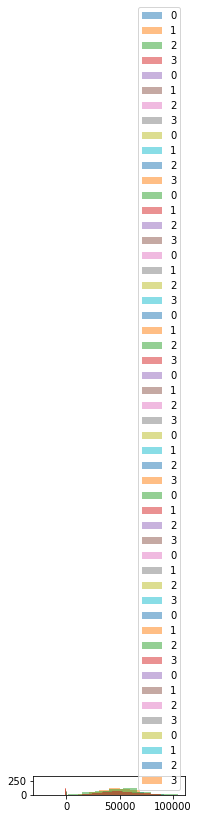

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def all_numeric(index):
    for row in data:
        if row[index] != '' and is_number(row[index]) == False:
            return False
    return True

plt.figure()
index = -1
cpt = 0
results = []
for i, lib in enumerate(school):
    results.append([])
bonus = False
for column in headers:
    index += 1
    for i, lib in enumerate(school):
        results[i] = []
    # test if the column is entirely made of numbers
    bNumeric = all_numeric(index)
    if not bNumeric or column == 'Index':
        continue
    
    cpt =+ 1
    for row in data:
        for i, lib in enumerate(school):
            if row[school_col] == lib and row[index] != '':
                results[i].append(float(row[index]))
    plt.subplot(10,2,cpt)
    plt.hist(results[0], alpha=0.5, label='0')
    plt.hist(results[1], alpha=0.5, label='1')
    plt.hist(results[2], alpha=0.5, label='2')
    plt.hist(results[3], alpha=0.5, label='3')
    plt.legend(loc='best')

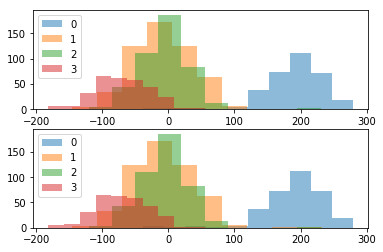

In [6]:
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
%matplotlib inline
#plt.figure(figsize=(12, 8))
plt.figure()
#a1 = list(map((lambda x: (x - mean) ** 2), data[1]))

plt.subplot(211)
plt.hist(results[0], alpha=0.5, label='0')
plt.hist(results[1], alpha=0.5, label='1')
plt.hist(results[2], alpha=0.5, label='2')
plt.hist(results[3], alpha=0.5, label='3')
plt.legend(loc='best')
plt.subplot(212)
plt.hist(results[0], alpha=0.5, label='0')
plt.hist(results[1], alpha=0.5, label='1')
plt.hist(results[2], alpha=0.5, label='2')
plt.hist(results[3], alpha=0.5, label='3')
plt.legend(loc='best')